In [115]:
import pandas as pd 
import env as env
import os
import wrangle as w
import explore as e
# data visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# stats data 
import scipy.stats as stats
import statsmodels.formula.api as smf


# sacling and modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



1. Load your zillow dataset.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

In [10]:
# wrangle data, split data
df=w.data_set()
df=w.wrangle_data(df)
train,validate,test=w.split_data(df)

## modeling data without scaling it:

In [12]:
train.shape

(1219902, 9)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219902 entries, 1571798 to 1587454
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1219902 non-null  int64  
 1   parcelid   1219902 non-null  int64  
 2   bathrooms  1219902 non-null  float64
 3   bedrooms   1219902 non-null  int64  
 4   area       1219902 non-null  int64  
 5   taxvalue   1219902 non-null  int64  
 6   yearbuilt  1219902 non-null  int64  
 7   taxamount  1219902 non-null  float64
 8   county     1219902 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 93.1+ MB


In [109]:
x_train= train[['area']]
y_train= train.taxvalue
x_validate= validate[['area']]
y_validate= validate.taxvalue

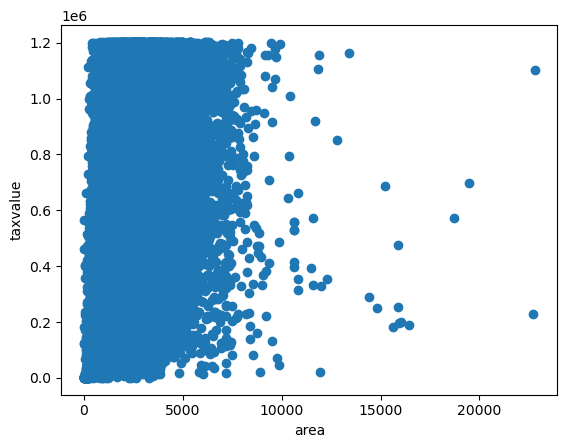

In [26]:
plt.scatter(x_train,y_train)
plt.xlabel('area')
plt.ylabel('taxvalue')
plt.show()

In [104]:
baseline=train.taxvalue.mean()
baseline

363532.06723244983

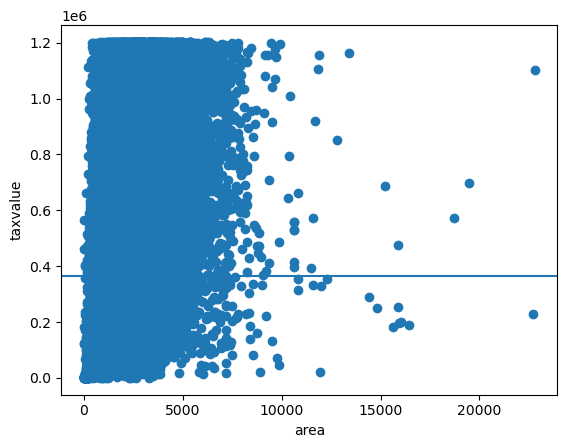

In [31]:
plt.scatter(x_train,y_train)
plt.axhline(baseline)
plt.xlabel('area')
plt.ylabel('taxvalue')
plt.show()

In [58]:
#Fitting model and creating yhat predictions
lr= LinearRegression()
lr.fit(x_train,y_train)
yhat=lr.predict(x_train)
yhat.shape

(1219902,)

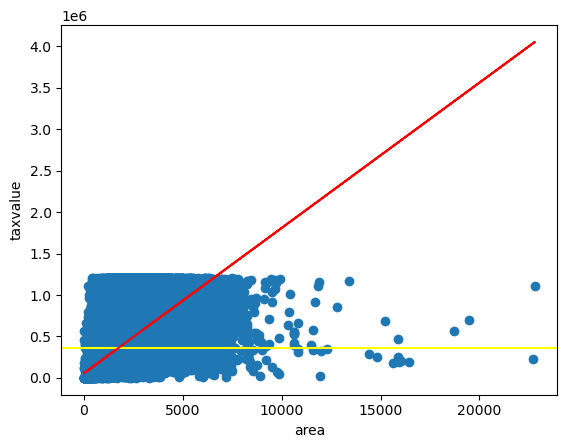

In [168]:
#plotting model with baseline and yhat line

plt.scatter(x_train,y_train)
#plt.ylim([0,2])
plt.axhline(baseline, color='yellow')
plt.plot(x_train,yhat, color='r')

plt.xlabel('area')
plt.ylabel('taxvalue')

plt.show()

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [68]:
baseline_residual= y_train - baseline
baseline_residual.head()

1571798    521467.932768
1723553    125978.932768
718174      27382.932768
1663205    -41774.067232
1087891   -131795.067232
Name: taxvalue, dtype: float64

In [75]:
yhat_residual= y_train - yhat
yhat_residual.info()

<class 'pandas.core.series.Series'>
Int64Index: 1219902 entries, 1571798 to 1587454
Series name: taxvalue
Non-Null Count    Dtype  
--------------    -----  
1219902 non-null  float64
dtypes: float64(1)
memory usage: 50.9 MB


In [139]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1219902 entries, 1571798 to 1587454
Series name: taxvalue
Non-Null Count    Dtype
--------------    -----
1219902 non-null  int64
dtypes: int64(1)
memory usage: 50.9 MB


In [140]:
model=pd.DataFrame({
    'area':x_train.area,
    'taxvalue': y_train
})
model['baseline']=baseline
model['yhat']=yhat
model['baseline_residual']=y_train - baseline
model['yhat_residual']=y_train - yhat

In [141]:
model.head()

,area,taxvalue,baseline,yhat,baseline_residual,yhat_residual
1571798,2987,885000,363532.067232,580049.248064,521467.932768,304950.751936
1723553,3013,489511,363532.067232,584607.353498,125978.932768,-95096.353498
718174,2572,390915,363532.067232,507294.872860,27382.932768,-116379.872860
1663205,1589,321758,363532.067232,334963.425088,-41774.067232,-13205.425088
1087891,1727,231737,363532.067232,359156.446240,-131795.067232,-127419.446240


### SUM OF SQUARED ERRORS (SSE)

 - squared your baseline residual and yhat residual
 - then sum it all up

In [155]:
model['baseline_residual2'] = model.baseline_residual ** 2
model['yhat_residual2'] = model.yhat_residual **2 

In [156]:
model.head(3)

,area,taxvalue,baseline,yhat,baseline_residual,yhat_residual,baseline_residual2,yhat_residual2
1571798,2987,885000,363532.067232,580049.248064,521467.932768,304950.751936,2.719288e+11,9.299496e+10
1723553,3013,489511,363532.067232,584607.353498,125978.932768,-95096.353498,1.587069e+10,9.043316e+09
718174,2572,390915,363532.067232,507294.872860,27382.932768,-116379.872860,7.498250e+08,1.354427e+10


In [158]:
model['SSE_baseline']=model.baseline_residual2.sum()
model['SSE_yhat']=model.yhat_residual2.sum()
SSE_baseline,SSE_yhat

(7.220942982660589e+16, 5.244624799783435e+16)

In [159]:
model.head(3)

,area,taxvalue,baseline,yhat,baseline_residual,yhat_residual,baseline_residual2,yhat_residual2,SSE_baseline,SSE_yhat
1571798,2987,885000,363532.067232,580049.248064,521467.932768,304950.751936,2.719288e+11,9.299496e+10,7.220943e+16,5.244625e+16
1723553,3013,489511,363532.067232,584607.353498,125978.932768,-95096.353498,1.587069e+10,9.043316e+09,7.220943e+16,5.244625e+16
718174,2572,390915,363532.067232,507294.872860,27382.932768,-116379.872860,7.498250e+08,1.354427e+10,7.220943e+16,5.244625e+16


### MEAN SQUARED ERRORS (MSE)
 - Divide the SSE by the length of your data.

In [160]:
model['MSE_baseline']=SSE_baseline/len(train)
model['MSE_yhat']=SSE_yhat/len(train)
MSE_baseline,MSE_yhat

(59192812067.367615, 42992181337.381485)

In [161]:
model.head(3)

,area,taxvalue,baseline,yhat,baseline_residual,yhat_residual,baseline_residual2,yhat_residual2,SSE_baseline,SSE_yhat,MSE_baseline,MSE_yhat
1571798,2987,885000,363532.067232,580049.248064,521467.932768,304950.751936,2.719288e+11,9.299496e+10,7.220943e+16,5.244625e+16,5.919281e+10,4.299218e+10
1723553,3013,489511,363532.067232,584607.353498,125978.932768,-95096.353498,1.587069e+10,9.043316e+09,7.220943e+16,5.244625e+16,5.919281e+10,4.299218e+10
718174,2572,390915,363532.067232,507294.872860,27382.932768,-116379.872860,7.498250e+08,1.354427e+10,7.220943e+16,5.244625e+16,5.919281e+10,4.299218e+10


### ROOT MEAN SQUARED ERROR (RMSE)
 - Square root of MSE

In [162]:
model['RMSE_baseline'] = MSE_baseline ** .5
model['RMSE_yhat'] = MSE_yhat ** .5
RMSE_baseline,RMSE_yhat


(243295.7296529629, 207345.56020658242)

In [163]:
model.head(3)

,area,taxvalue,baseline,yhat,baseline_residual,yhat_residual,baseline_residual2,yhat_residual2,SSE_baseline,SSE_yhat,MSE_baseline,MSE_yhat,RMSE_baseline,RMSE_yhat
1571798,2987,885000,363532.067232,580049.248064,521467.932768,304950.751936,2.719288e+11,9.299496e+10,7.220943e+16,5.244625e+16,5.919281e+10,4.299218e+10,243295.729653,207345.560207
1723553,3013,489511,363532.067232,584607.353498,125978.932768,-95096.353498,1.587069e+10,9.043316e+09,7.220943e+16,5.244625e+16,5.919281e+10,4.299218e+10,243295.729653,207345.560207
718174,2572,390915,363532.067232,507294.872860,27382.932768,-116379.872860,7.498250e+08,1.354427e+10,7.220943e+16,5.244625e+16,5.919281e+10,4.299218e+10,243295.729653,207345.560207


### Calculate R2 score

In [107]:
r2_score(y_train,yhat)

0.27369253401153004

# Model data scaled it:

In [108]:
train.head()

,id,parcelid,bathrooms,bedrooms,area,taxvalue,yearbuilt,taxamount,county
1571798,2176655,14455139,2.5,4,2987,885000,2006,13617.38,Orange
1723553,2387407,10744163,2.0,3,3013,489511,1977,5768.57,LA
718174,994436,13058070,3.0,4,2572,390915,1986,4944.11,LA
1663205,2303831,12408853,1.0,3,1589,321758,1959,4031.78,LA
1087891,1506948,17148379,2.0,3,1727,231737,1962,2708.80,Ventura


In [112]:
def minmax_scale_data(X_train, X_validate):
    # Initialize MinMaxScaler object
    scaler = MinMaxScaler()
    
    # Fit scaler object to training data
    scaler.fit(X_train)
    
    # Transform training and validation data
    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    
    # Return scaled data
    return X_train_scaled, X_validate_scaled

In [116]:
x_train_scaled,x_validate_scaled=minmax_scale_data(x_train, x_validate)

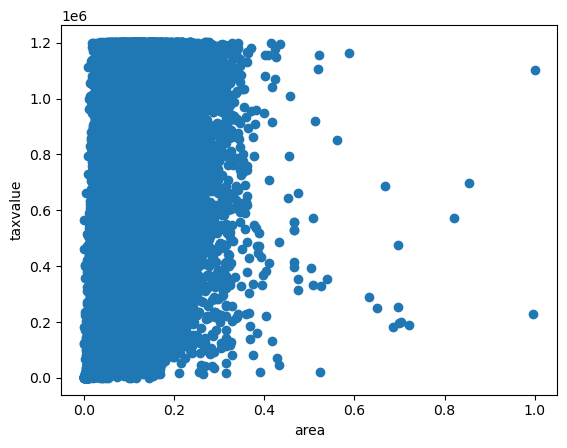

In [118]:
plt.scatter(x_train_scaled,y_train)
plt.xlabel('area')
plt.ylabel('taxvalue')
plt.show()

In [126]:
lr= LinearRegression()
lr.fit(x_train_scaled,y_train)
yhat=lr.predict(x_train_scaled)
yhat

array([580049.24806384, 584607.35349829, 507294.87286002, ...,
       379141.9854528 , 302881.3752994 , 331807.81363345])

In [127]:
yhat_residual= y_train - yhat
yhat_residual

1571798    304950.751936
1723553    -95096.353498
718174    -116379.872860
1663205    -13205.425088
1087891   -127419.446240
               ...      
531544    -112180.971785
424806      13097.368925
518081    -253608.985453
669341      61530.624701
1587454   -123831.813633
Name: taxvalue, Length: 1219902, dtype: float64

### SUM OF SQUARED ERRORS (SSE)

In [128]:
baseline_residual2 = baseline_residual ** 2
yhat_residual2 = yhat_residual **2 

In [130]:
SSE_baseline=baseline_residual2.sum()
SSE_yhat=yhat_residual2.sum()
SSE_baseline,SSE_yhat

(7.220942982660589e+16, 5.244624799783435e+16)

### MEAN SQUARED ERRORS

In [131]:
MSE_baseline=SSE_baseline/len(train)
MSE_yhat=SSE_yhat/len(train)
MSE_baseline,MSE_yhat

(59192812067.367615, 42992181337.381485)

### ROOT MEAN SQUARED ERROR

In [129]:
RMSE_baseline = MSE_baseline ** .5
RMSE_yhat = MSE_yhat ** .5
RMSE_baseline,RMSE_yhat


(243295.7296529629, 207345.56020658242)

### Calculate R2 score



In [172]:
r_squared=r2_score(y_train,yhat)

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?
- 0.273

8. Is your model better than the baseline model?
- Yes

In [178]:
if SSE_yhat < SSE_baseline:
    print("The yhat model performs better than the baseline model.")
else:
    print("The baseline model performs better than the yhat model.")

The yhat model performs better than the baseline model.


In [177]:
print("The amount of variance explained by the yhat model is:", r_squared)

The amount of variance explained by the yhat model is: 0.27369253401153026


8. Create a file named evaluate.py that contains the following functions.

 - plot_residuals(y, yhat): creates a residual plot
 - regression_errors(y, yhat): returns the following values:
      - sum of squared errors (SSE)
      - explained sum of squares (ESS)
      - total sum of squares (TSS)
      - mean squared error (MSE)
      - root mean squared error (RMSE)

In [179]:
def plot_residuals(y, yhat):
    """
    Creates a residual plot given the true values `y` and the predicted values `yhat`.
    """
    # calculate residuals
    residuals = y - yhat
    
    # create a scatter plot of residuals against yhat
    plt.scatter(yhat, residuals)
    
    # add a horizontal line at y=0 for reference
    plt.axhline(y=0, color='r', linestyle='-')
    
    # set axis labels and title
    plt.xlabel("Predicted values (yhat)")
    plt.ylabel("Residuals")
    plt.title("Residual plot")
    
    # show the plot
    plt.show()


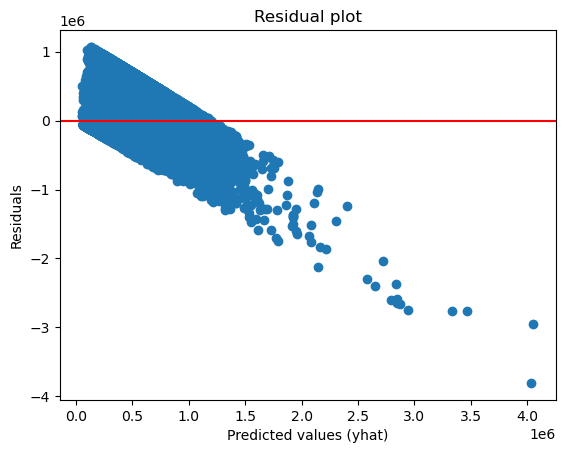

In [181]:
plot_residuals(y_train,yhat)

In [182]:
def regression_errors(y, yhat):
    """
    Calculates regression error metrics given the true values `y` and the predicted values `yhat`.
    Returns a Pandas DataFrame with SSE, ESS, TSS, MSE, and RMSE.
    """
    # calculate SSE
    SSE = np.sum((y - yhat)**2)
    
    # calculate ESS
    ESS = np.sum((yhat - np.mean(y))**2)
    
    # calculate TSS
    TSS = np.sum((y - np.mean(y))**2)
    
    # calculate MSE
    MSE = SSE / len(y)
    
    # calculate RMSE
    RMSE = np.sqrt(MSE)
    
    # create a DataFrame to store the regression error metrics
    error_df = pd.DataFrame({'Metric': ['SSE', 'ESS', 'TSS', 'MSE', 'RMSE'],
                             'Value': [SSE, ESS, TSS, MSE, RMSE]})
    
    # set the 'Metric' column as the index of the DataFrame
    error_df.set_index('Metric', inplace=True)
    
    # return the DataFrame
    return error_df

In [184]:
regression_errors(y_train,yhat)

,Value
Metric,
SSE,5.244625e+16
ESS,1.976318e+16
TSS,7.220943e+16
MSE,4.299218e+10
RMSE,2.073456e+05


In [188]:
import numpy as np

def baseline_mean_errors(y):
    """
    Calculates regression error metrics for the baseline model given the true values `y`.
    Returns SSE, MSE, and RMSE.
    """
    # calculate the mean of y
    y_mean = np.mean(y)
    
    # calculate the SSE
    SSE = np.sum((y - y_mean)**2)
    
    # calculate the MSE
    MSE = SSE / len(y)
    
    # calculate the RMSE
    RMSE = np.sqrt(MSE)
    
    # return the calculated values as a tuple
    return SSE, MSE, RMSE


In [189]:
baseline_mean_errors(y_train)

(7.220942982660589e+16, 59192812067.367615, 243295.7296529629)

In [186]:

def regression_errors(y, yhat):
    """
    Calculates regression error metrics given the true values `y` and the predicted values `yhat`.
    Returns a Pandas DataFrame with SSE, ESS, TSS, MSE, RMSE, and baseline error metrics.
    """
    # calculate SSE
    SSE = np.sum((y - yhat)**2)
    
    # calculate ESS
    ESS = np.sum((yhat - np.mean(y))**2)
    
    # calculate TSS
    TSS = np.sum((y - np.mean(y))**2)
    
    # calculate MSE
    MSE = SSE / len(y)
    
    # calculate RMSE
    RMSE = np.sqrt(MSE)
    
    # calculate baseline error metrics
    baseline_SSE, baseline_MSE, baseline_RMSE = baseline_mean_errors(y)
    
    # create a DataFrame to store the regression error metrics
    error_df = pd.DataFrame({'Metric': ['SSE', 'ESS', 'TSS', 'MSE', 'RMSE', 'Baseline SSE', 'Baseline MSE', 'Baseline RMSE'],
                             'Value': [SSE, ESS, TSS, MSE, RMSE, baseline_SSE, baseline_MSE, baseline_RMSE]})
    
    # set the 'Metric' column as the index of the DataFrame
    error_df.set_index('Metric', inplace=True)
    
    # return the DataFrame
    return error_df


def baseline_mean_errors(y):
    """
    Calculates regression error metrics for the baseline model given the true values `y`.
    Returns SSE, MSE, and RMSE.
    """
    # calculate the mean of y
    y_mean = np.mean(y)
    
    # calculate the SSE
    SSE = np.sum((y - y_mean)**2)
    
    # calculate the MSE
    MSE = SSE / len(y)
    
    # calculate the RMSE
    RMSE = np.sqrt(MSE)
    
    # return the calculated values as a tuple
    return SSE, MSE, RMSE


In [187]:
regression_errors(y_train,yhat)

,Value
Metric,
SSE,5.244625e+16
ESS,1.976318e+16
TSS,7.220943e+16
MSE,4.299218e+10
RMSE,2.073456e+05
Baseline SSE,7.220943e+16
Baseline MSE,5.919281e+10
Baseline RMSE,2.432957e+05


In [190]:
def better_than_baseline(y, yhat):
    """
    Determines whether the model with predicted values `yhat` performs better than the baseline model
    with mean values of `y`. Returns True if the model is better than the baseline, otherwise False.
    """
    # calculate the SSE for the baseline model
    baseline_SSE = baseline_mean_errors(y)[0]
    
    # calculate the SSE for the model with predicted values yhat
    model_SSE = np.sum((y - yhat)**2)
    
    # compare the SSEs and return True if the model's SSE is less than the baseline's SSE
    return model_SSE < baseline_SSE


In [191]:
better_than_baseline(y_train,yhat)

True